In [14]:
import numpy as np #linear algebra
import pandas as pd #data manipulation and analysis
import seaborn as sns #data visualization
import matplotlib.pyplot as plt #data visualization
import sklearn.preprocessing as skp #machine learning (preprocessing)
import sklearn.cluster as skc #machine learning (clustering)
import warnings # ignore warnings
warnings.filterwarnings('ignore')
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib.path as mpath
from adjustText import adjust_text

path = "../data/cleanData/fullData.csv"

# # Permanently changes the pandas settings
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)

In [15]:
df = pd.read_csv(path)
df = df.drop(['Unnamed: 0'], axis=1)
df=df.fillna(0)
df.head()

,County Name,"Population Estimates, July 1 2021, (V2021)",Persons under 5 years,Persons under 18 years,Persons 65 years and over,Female persons,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,...,"Mean travel time to work (minutes), workers age 16 years+, 2017-2021","Median household income (in 2021 dollars), 2017-2021","Per capita income in past 12 months (in 2021 dollars), 2017-2021",Persons in poverty,"Total employer establishments, 2020","Total employment, 2020","Total annual payroll, 2020 ($1,000)","Population per square mile, 2020","Land area in square miles, 2020",Banned or not
0,"Adams County, Ohio",27542,1707.60,6665.16,5095.27,13798.54,26660.66,165.25,165.25,82.63,...,36.1,44467,24539,5205.44,385,4572,167427,47.1,583.87,0.0
1,"Allen County, Ohio",101670,6100.20,23587.44,18503.94,50021.64,84081.09,12912.09,305.01,915.03,...,19.5,55114,28671,15555.51,2286,45012,1983272,253.9,402.55,1.0
2,"Ashland County, Ohio",52316,2929.70,11666.47,10201.62,26524.21,50484.94,470.84,156.95,418.53,...,24.2,58168,28992,5702.44,1034,18234,701075,124.0,422.99,0.0
3,"Ashtabula County, Ohio",97337,5450.87,21414.14,19467.40,47889.80,90231.40,3796.14,389.35,486.68,...,25.8,49680,26777,15281.91,1806,24464,913850,139.0,702.07,0.0
4,"Athens County, Ohio",62056,2296.07,8998.12,8874.01,31090.06,56657.13,1799.62,248.22,1737.57,...,21.9,47061,24990,12969.70,1029,13265,469095,124.0,503.64,0.0


# Full Housing Data set

In [24]:
housingDf = df.iloc[:, 16:29]
housingDf

,"Housing units, July 1, 2021, (V2021)","Owner-occupied housing unit rate, 2017-2021","Median value of owner-occupied housing units, 2017-2021","Median selected monthly owner costs -with a mortgage, 2017-2021","Median selected monthly owner costs -without a mortgage, 2017-2021","Median gross rent, 2017-2021","Building permits, 2021","Households, 2017-2021","Persons per household, 2017-2021","Living in same house 1 year ago of persons age 1 year+, 2017-2021","Language other than English spoken at home of persons age 5 years+, 2017-2021","Households with a computer, 2017-2021","Households with a broadband Internet subscription, 2017-2021"
0,12703,73.2,118300,1159,403,593,25.0,10163,2.68,24760.26,495.76,23713.66,21014.55
1,44707,66.9,126900,1126,457,758,226.0,40671,2.42,88046.22,3151.77,92113.02,86724.51
2,22513,76.5,143100,1124,432,748,61.0,20531,2.46,45148.71,3191.28,46299.66,43317.65
3,46355,71.6,121100,1086,426,735,168.0,38332,2.47,84877.86,6521.58,85948.57,80011.01
4,26387,59.8,150800,1210,464,840,110.0,22381,2.41,43439.20,3226.91,56222.74,50079.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,57308,64.2,177000,1437,553,845,547.0,53010,2.37,106375.02,6093.71,126113.34,118827.38
84,24130,81.2,242400,1696,626,1050,1253.0,21654,2.71,55095.41,4612.94,62177.25,60228.12
85,9847,72.5,133600,1139,420,682,70.0,9036,2.40,20123.32,607.82,19884.53,18386.68
86,246735,66.8,159800,1299,525,882,788.0,228283,2.33,472041.77,37634.31,497310.52,473117.04


## K-Means Clustering #1

### 1. Scaling

In [25]:
df_cluster = housingDf

In [26]:
# Scaling the new data frame for clustering
sc = skp.StandardScaler()
data_scale = np.array(df_cluster)
scaled = sc.fit_transform(data_scale.astype(float))
scaled_df = pd.DataFrame(scaled, columns=df_cluster.columns)
scaled_df.head()

,"Housing units, July 1, 2021, (V2021)","Owner-occupied housing unit rate, 2017-2021","Median value of owner-occupied housing units, 2017-2021","Median selected monthly owner costs -with a mortgage, 2017-2021","Median selected monthly owner costs -without a mortgage, 2017-2021","Median gross rent, 2017-2021","Building permits, 2021","Households, 2017-2021","Persons per household, 2017-2021","Living in same house 1 year ago of persons age 1 year+, 2017-2021","Language other than English spoken at home of persons age 5 years+, 2017-2021","Households with a computer, 2017-2021","Households with a broadband Internet subscription, 2017-2021"
0,-0.461465,0.057532,-0.723934,-0.291559,-0.895488,-1.624353,-0.397810,-0.472996,1.410608,-0.490601,-0.353976,-0.484075,-0.487935
1,-0.148431,-1.020021,-0.511531,-0.453171,-0.177526,-0.181102,-0.148449,-0.144003,-0.437886,-0.149525,-0.253477,-0.150617,-0.148734
2,-0.365513,0.621964,-0.111422,-0.462966,-0.509916,-0.268572,-0.353149,-0.361189,-0.153503,-0.380719,-0.251982,-0.373964,-0.372805
3,-0.132311,-0.216132,-0.654780,-0.649065,-0.589690,-0.382283,-0.220404,-0.169226,-0.082407,-0.166601,-0.125969,-0.180670,-0.183390
4,-0.327621,-2.234405,0.078753,-0.041794,-0.084457,0.536150,-0.292359,-0.341239,-0.508982,-0.389932,-0.250634,-0.325588,-0.337901


### 2. Number of Clusters

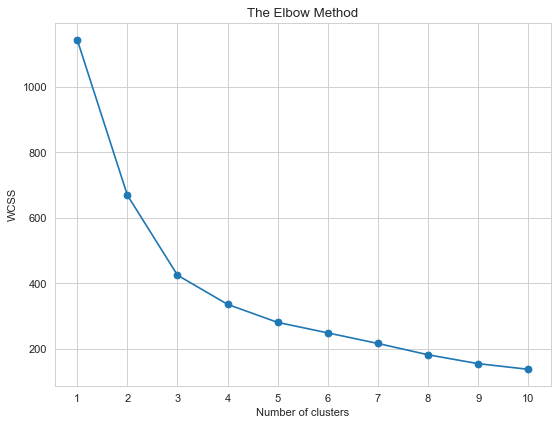

In [27]:
###Decide n-cluster using Elbow Method
wcss=[]
k_range = range(1,11)
for i in k_range:
    kmeans = skc.KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
plt.plot(k_range, wcss, marker='o')
# for i, value in enumerate(wcss):
#     ax.text(i+1.05, value-0.005, round(value,1), fontsize=12, fontweight='bold')
    
plt.xticks(k_range)
# plt.grid()
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow_methodA.png')
plt.show()


### 3. Clustering (Using chosen K values)

In [28]:
# Clustering K Means, K=3
kmeans_3 = skc.KMeans(n_clusters=3,random_state=42)
kmeans_3.fit(scaled_df)
kmeans_3.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0,
       2, 0, 1, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0],
      dtype=int32)

In [29]:
# Assign clustering result to each country in the data frame
df_cluster['cluster_id'] = kmeans_3.labels_
df_cluster.head()

,"Housing units, July 1, 2021, (V2021)","Owner-occupied housing unit rate, 2017-2021","Median value of owner-occupied housing units, 2017-2021","Median selected monthly owner costs -with a mortgage, 2017-2021","Median selected monthly owner costs -without a mortgage, 2017-2021","Median gross rent, 2017-2021","Building permits, 2021","Households, 2017-2021","Persons per household, 2017-2021","Living in same house 1 year ago of persons age 1 year+, 2017-2021","Language other than English spoken at home of persons age 5 years+, 2017-2021","Households with a computer, 2017-2021","Households with a broadband Internet subscription, 2017-2021",cluster_id
0,12703,73.2,118300,1159,403,593,25.0,10163,2.68,24760.26,495.76,23713.66,21014.55,0
1,44707,66.9,126900,1126,457,758,226.0,40671,2.42,88046.22,3151.77,92113.02,86724.51,0
2,22513,76.5,143100,1124,432,748,61.0,20531,2.46,45148.71,3191.28,46299.66,43317.65,0
3,46355,71.6,121100,1086,426,735,168.0,38332,2.47,84877.86,6521.58,85948.57,80011.01,0
4,26387,59.8,150800,1210,464,840,110.0,22381,2.41,43439.20,3226.91,56222.74,50079.19,0


In [30]:
df_cluster['Banned or not'] = df.iloc[:,-1]
df_cluster['County Name'] = df.iloc[:,0]
df_cluster.head()

,"Housing units, July 1, 2021, (V2021)","Owner-occupied housing unit rate, 2017-2021","Median value of owner-occupied housing units, 2017-2021","Median selected monthly owner costs -with a mortgage, 2017-2021","Median selected monthly owner costs -without a mortgage, 2017-2021","Median gross rent, 2017-2021","Building permits, 2021","Households, 2017-2021","Persons per household, 2017-2021","Living in same house 1 year ago of persons age 1 year+, 2017-2021","Language other than English spoken at home of persons age 5 years+, 2017-2021","Households with a computer, 2017-2021","Households with a broadband Internet subscription, 2017-2021",cluster_id,Banned or not,County Name
0,12703,73.2,118300,1159,403,593,25.0,10163,2.68,24760.26,495.76,23713.66,21014.55,0,0.0,"Adams County, Ohio"
1,44707,66.9,126900,1126,457,758,226.0,40671,2.42,88046.22,3151.77,92113.02,86724.51,0,1.0,"Allen County, Ohio"
2,22513,76.5,143100,1124,432,748,61.0,20531,2.46,45148.71,3191.28,46299.66,43317.65,0,0.0,"Ashland County, Ohio"
3,46355,71.6,121100,1086,426,735,168.0,38332,2.47,84877.86,6521.58,85948.57,80011.01,0,0.0,"Ashtabula County, Ohio"
4,26387,59.8,150800,1210,464,840,110.0,22381,2.41,43439.20,3226.91,56222.74,50079.19,0,0.0,"Athens County, Ohio"


In [31]:
groupeddf = df_cluster.groupby('cluster_id')['Banned or not'].value_counts(ascending=True)
groupeddf

cluster_id  Banned or not
0           1.0               7
            0.0              59
1           0.0               3
2           1.0               3
            0.0              16
Name: Banned or not, dtype: int64

### 4. Plotting clusters with chosen k value

In [32]:
# Filter counties for each cluster
cluster0 = df_cluster.loc[(df_cluster['cluster_id'] == 0)]
cluster1 = df_cluster.loc[(df_cluster['cluster_id'] == 1)]
cluster2 = df_cluster.loc[(df_cluster['cluster_id'] == 2)]

# Extract coordinates for counties
cluster0_coords = cluster0[[df_cluster.columns[2], df_cluster.columns[1]]].values
cluster1_coords = cluster1[[df_cluster.columns[2], df_cluster.columns[1]]].values
cluster2_coords = cluster2[[df_cluster.columns[2], df_cluster.columns[1]]].values

# Filter banned counties for each cluster
cluster0_banned = df_cluster.loc[(df_cluster['cluster_id'] == 0) & (df_cluster['Banned or not'] == 1)]
cluster1_banned = df_cluster.loc[(df_cluster['cluster_id'] == 1) & (df_cluster['Banned or not'] == 1)]
cluster2_banned = df_cluster.loc[(df_cluster['cluster_id'] == 2) & (df_cluster['Banned or not'] == 1)]

# Extract coordinates for banned counties
cluster0_banned_coords = cluster0_banned[[df_cluster.columns[2], df_cluster.columns[1]]].values
cluster1_banned_coords = cluster1_banned[[df_cluster.columns[2], df_cluster.columns[1]]].values
cluster2_banned_coords = cluster2_banned[[df_cluster.columns[2], df_cluster.columns[1]]].values



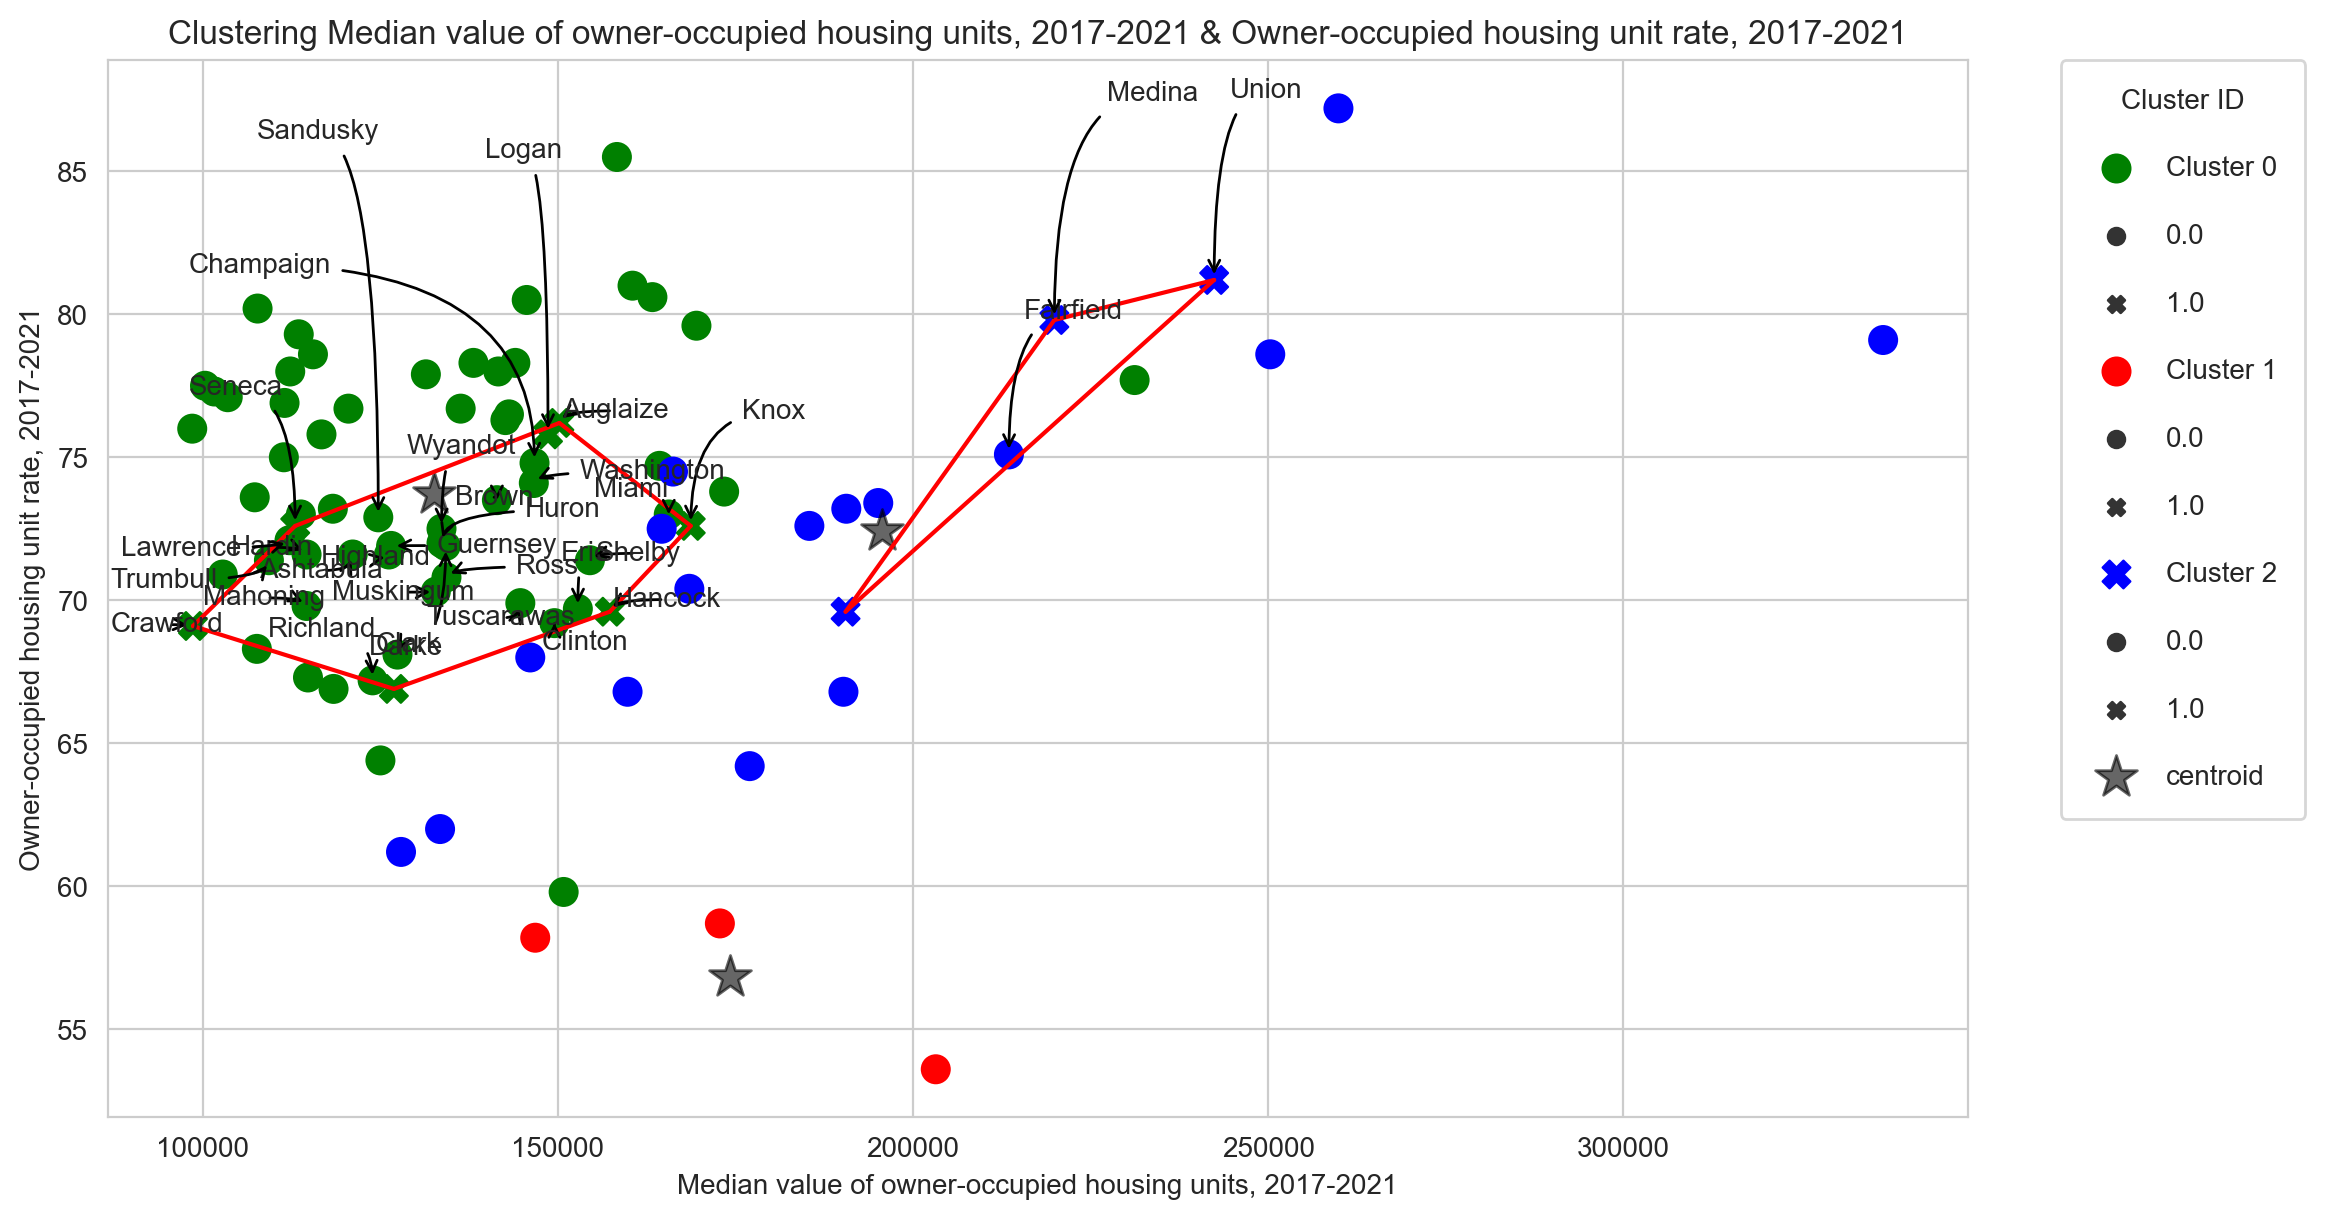

In [33]:
# Calculate convex hulls
hull0Banned = ConvexHull(cluster0_banned_coords)
hull2Banned = ConvexHull(cluster2_banned_coords)

sns.set_style('whitegrid')

# Centroid Inverse Scaling
centroids_ori_scale = sc.inverse_transform(kmeans_3.cluster_centers_)

# Plot Clustering Result
fig, ax = plt.subplots(figsize=(12, 7), dpi=200)

# Scatter plot for cluster 0
sns.scatterplot(df_cluster.loc[df_cluster['cluster_id'] == 0, df_cluster.columns[2]],
                df_cluster.loc[df_cluster['cluster_id'] == 0, df_cluster.columns[1]],
                color = 'green', s=100, edgecolor = 'green', marker='o', label= 'Cluster 0', style=df_cluster['Banned or not'])

# Scatter plot for cluster 1
sns.scatterplot(df_cluster.loc[df_cluster['cluster_id'] == 1, df_cluster.columns[2]], 
                df_cluster.loc[df_cluster['cluster_id'] == 1, df_cluster.columns[1]], 
                color = 'red', s=100, edgecolor = 'red', label = 'Cluster 1', marker='o', style=df_cluster['Banned or not'])

# Scatter plot for cluster 2
sns.scatterplot(df_cluster.loc[df_cluster['cluster_id'] == 2, df_cluster.columns[2]],
                df_cluster.loc[df_cluster['cluster_id'] == 2, df_cluster.columns[1]],
                color = 'blue', s=100, edgecolor = 'blue', label = 'Cluster 2', marker='o', style=df_cluster['Banned or not'])


# Create a Path object from the convex hull vertices
path0Banned = mpath.Path(cluster0_banned_coords[hull0Banned.vertices])
path2Banned = mpath.Path(cluster2_banned_coords[hull2Banned.vertices])

text = []
text2 = []
# Iterate through the data points and annotate the ones inside the convex hulls
for i in range(len(df_cluster)):
    if df_cluster.loc[i, 'cluster_id'] == 0:
        point = [df_cluster.loc[i, df_cluster.columns[2]], df_cluster.loc[i, df_cluster.columns[1]]]
        if path0Banned.contains_point(point):
            text.append(ax.annotate(f"{df_cluster.iloc[i, -1][:-13]}", (point[0], point[1]),
                                     textcoords="offset points", xytext=(0, 10), ha='center', 
                                    arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90", color='black')))

    elif df_cluster.loc[i, 'cluster_id'] == 2:
        point = [df_cluster.loc[i, df_cluster.columns[2]], df_cluster.loc[i, df_cluster.columns[1]]]
        if path2Banned.contains_point(point):
            text2.append(ax.annotate(f"{df_cluster.iloc[i, -1][:-13]}", (point[0], point[1]), 
                                     textcoords="offset points", xytext=(0, 10), ha='center',
                                     arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90", color='black')))

# Use adjust_text to prevent text overlap
adjust_text(text)
adjust_text(text2)


# Plot convex hulls
for simplex0b in hull0Banned.simplices:
    ax.plot(cluster0_banned_coords[simplex0b, 0], cluster0_banned_coords[simplex0b, 1], 'k-', color='red')
for simplex2b in hull2Banned.simplices:
    ax.plot(cluster2_banned_coords[simplex2b, 0], cluster2_banned_coords[simplex2b, 1], 'k-', color='red')

# Plot centroids
ax.scatter(centroids_ori_scale[:, 2], centroids_ori_scale[:,1], c='black', s=250, marker='*', alpha=0.6, label = 'centroid')

# Add labels and legend
plt.legend(title= "Cluster ID", labelspacing=1.5, borderpad=1, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.xlabel(df_cluster.columns[2])
plt.ylabel(df_cluster.columns[1])
plt.title(f"Clustering {df_cluster.columns[2]} & {df_cluster.columns[1]}")

# Show the plot
plt.savefig('housingCluster.png')

plt.show()



### Get info into table

In [34]:
# Iterate through the data points and annotate the ones inside the convex hulls
li = []
for i in range(len(df_cluster)):
    if df_cluster.loc[i, 'cluster_id'] == 0:
        point = [df_cluster.loc[i, df_cluster.columns[2]], df_cluster.loc[i, df_cluster.columns[1]]]
        if path0Banned.contains_point(point):
            li.append(df_cluster.iloc[i, -1])
    elif df_cluster.loc[i, 'cluster_id'] == 2:
        point = [df_cluster.loc[i, df_cluster.columns[2]], df_cluster.loc[i, df_cluster.columns[1]]]
        if path2Banned.contains_point(point):
            li.append(df_cluster.iloc[i, -1])


In [35]:
li

['Ashtabula County, Ohio',
 'Auglaize County, Ohio',
 'Brown County, Ohio',
 'Champaign County, Ohio',
 'Clark County, Ohio',
 'Clinton County, Ohio',
 'Crawford County, Ohio',
 'Darke County, Ohio',
 'Erie County, Ohio',
 'Fairfield County, Ohio',
 'Guernsey County, Ohio',
 'Hancock County, Ohio',
 'Hardin County, Ohio',
 'Highland County, Ohio',
 'Huron County, Ohio',
 'Knox County, Ohio',
 'Lawrence County, Ohio',
 'Logan County, Ohio',
 'Mahoning County, Ohio',
 'Medina County, Ohio',
 'Miami County, Ohio',
 'Muskingum County, Ohio',
 'Richland County, Ohio',
 'Ross County, Ohio',
 'Sandusky County, Ohio',
 'Shelby County, Ohio',
 'Trumbull County, Ohio',
 'Tuscarawas County, Ohio',
 'Washington County, Ohio',
 'Seneca County, Ohio',
 'Union County, Ohio',
 'Wyandot County, Ohio']

In [14]:
dfs = []
for x in range(len(li)):
    clusterDF = df_cluster[df_cluster['County Name'] == li[x]]
    dfs.append(clusterDF)

clusterDFmain = pd.concat(dfs, ignore_index=True)
scatterPlotdf = clusterDFmain[['County Name','Median value of owner-occupied housing units, 2017-2021','cluster_id', 'Owner-occupied housing unit rate, 2017-2021', 'Banned or not']]
scatterPlotdf.describe()


,"Median value of owner-occupied housing units, 2017-2021",cluster_id,"Owner-occupied housing unit rate, 2017-2021",Banned or not
count,32.000000,32.000000,32.000000,32.000000
mean,143218.750000,0.187500,72.290625,0.250000
std,31878.867887,0.592289,3.016659,0.439941
min,98600.000000,0.000000,67.200000,0.000000
25%,124500.000000,0.000000,70.200000,0.000000
50%,134250.000000,0.000000,71.900000,0.000000
75%,150850.000000,0.000000,73.125000,0.250000
max,242400.000000,2.000000,81.200000,1.000000


In [15]:
# Assuming your DataFrame is called "df" and the column with the cluster information is called "cluster"
cluster_stats = scatterPlotdf.iloc[:, :-1].groupby('cluster_id').describe()
cluster_stats

Median value of owner-occupied housing units, 2017-2021  \
                                                             count   
cluster_id                                                           
0                                                        29.0        
2                                                         3.0        

                                                                       \
                     mean           std       min       25%       50%   
cluster_id                                                              
0           134731.034483  17686.296217   98600.0  123900.0  133600.0   
2           225266.666667  15179.042570  213500.0  216700.0  219900.0   

                               Owner-occupied housing unit rate, 2017-2021  \
                 75%       max                                       count   
cluster_id                                                                   
0           148600.0  168700.0                                        29.0   
2           231150.0  242400.0                                         3.0   

                                                                
                 mean       std   min    25%   50%   75%   max  
cluster_id                                                      
0           71.627586  2.118776  67.2  69.90  71.6  72.6  76.2  
2           78.700000  3.195309  75.1  77.45  79.8  80.5  81.2

Cluster 0 has a median value of owner-occupied housing units ranging from $98,600 to $168,700, with a mean of $134,731 and a standard deviation of $17,686. This suggests that counties in this cluster have relatively affordable owner-occupied housing units. The owner-occupied housing unit rate in this cluster ranges from 67.2% to 76.2%, with a mean of 71.6% and a standard deviation of 2.12%. This suggests that counties in this cluster have relatively high rates of owner-occupied housing units.

Cluster 2 has a median value of owner-occupied housing units ranging from $213,500 to $242,400, with a mean of $225,267 and a standard deviation of $15,179. This suggests that counties in this cluster have relatively expensive owner-occupied housing units. The owner-occupied housing unit rate in this cluster ranges from 75.1% to 81.2%, with a mean of 78.7% and a standard deviation of 3.20%. This suggests that counties in this cluster have relatively high rates of owner-occupied housing units, but with more variability than Cluster 0.

Overall, these summary statistics suggest that there are important differences between the two clusters in terms of the affordability of owner-occupied housing units. Cluster 0 seems to represent counties with more affordable housing options, while Cluster 2 represents counties with more expensive housing options. Additionally, both clusters have relatively high rates of owner-occupied housing units, which may indicate a preference for home ownership in these areas. However, further analysis would be necessary to fully understand the underlying factors driving these patterns.

In [48]:
# pull summary stats of each point within the cluster
    # average, STD, range
    # "counties in these clusterds have simlar means...."
# piont out what is going on and how I came to this conclusion 
# annotate  

### Other 

In [111]:
# # hull0 = ConvexHull(cluster0_coords)
# # hull2 = ConvexHull(cluster2_coords)
# hull0Banned = ConvexHull(cluster0_banned_coords)
# hull2Banned = ConvexHull(cluster2_banned_coords)
 
# sns.set_style('whitegrid')

# # Centroid Inverse Scaling
# centroids_ori_scale = sc.inverse_transform(kmeans_3.cluster_centers_)

# # Plot Clustering Result
# fig, ax = plt.subplots(figsize=(12, 7), dpi=200)

# # Scatter plot for cluster 0
# sns.scatterplot(df_cluster.loc[df_cluster['cluster_id'] == 0, df_cluster.columns[2]],
#                 df_cluster.loc[df_cluster['cluster_id'] == 0, df_cluster.columns[1]],
#                 color = 'green', s=100, edgecolor = 'green', marker='o', label= '0', style=df_cluster['Banned or not'])

# # Scatter plot for cluster 1
# sns.scatterplot(df_cluster.loc[df_cluster['cluster_id'] == 1, df_cluster.columns[2]], 
#                 df_cluster.loc[df_cluster['cluster_id'] == 1, df_cluster.columns[1]], 
#                 color = 'red', s=100, edgecolor = 'red', label = '1', marker='o', style=df_cluster['Banned or not'])

# # Scatter plot for cluster 2
# sns.scatterplot(df_cluster.loc[df_cluster['cluster_id'] == 2, df_cluster.columns[2]],
#                 df_cluster.loc[df_cluster['cluster_id'] == 2, df_cluster.columns[1]],
#                 color = 'blue', s=100, edgecolor = 'blue', label = '2', marker='o', style=df_cluster['Banned or not'])
    
# for simplex0b in hull0Banned.simplices:
#     ax.plot(cluster0_banned_coords[simplex0b, 0], cluster0_banned_coords[simplex0b, 1], 'k-', color='red')
# for simplex2b in hull2Banned.simplices:
#     ax.plot(cluster2_banned_coords[simplex2b, 0], cluster2_banned_coords[simplex2b, 1], 'k-', color='red')


# # Plot centroids
# ax.scatter(centroids_ori_scale[:, 2], centroids_ori_scale[:,1], c='black', s=250, marker='*', alpha=0.6, label = 'centroid')

# # Add labels and legend
# plt.legend(title= "Cluster ID", labelspacing=1.5, borderpad=1, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# plt.xlabel(df_cluster.columns[2])
# plt.ylabel(df_cluster.columns[1])
# plt.title(f"Clustering {df_cluster.columns[2]} & {df_cluster.columns[1]}")

# # Show the plot
# plt.show()


### Random code chuncks

In [49]:
### GOOD CODE

# hull0 = ConvexHull(cluster0_banned_coords)
# hull2 = ConvexHull(cluster2_banned_coords)


# sns.set_style('whitegrid')

# # Centroid Inverse Scaling
# centroids_ori_scale = sc.inverse_transform(kmeans_3.cluster_centers_)

# # Plot Clustering Result
# fig, ax = plt.subplots(figsize=(12, 7), dpi=200)

# # Scatter plot for cluster 0
# sns.scatterplot(df_cluster.loc[df_cluster['cluster_id'] == 0, df_cluster.columns[2]],
#                 df_cluster.loc[df_cluster['cluster_id'] == 0, df_cluster.columns[1]],
#                 color = 'green', s=100, edgecolor = 'green', marker='o', label= '0', style=df_cluster['Banned or not'])

# # Scatter plot for cluster 1
# sns.scatterplot(df_cluster.loc[df_cluster['cluster_id'] == 1, df_cluster.columns[2]], 
#                 df_cluster.loc[df_cluster['cluster_id'] == 1, df_cluster.columns[1]], 
#                 color = 'red', s=100, edgecolor = 'red', label = '1', marker='o', style=df_cluster['Banned or not'])

# # Scatter plot for cluster 2
# sns.scatterplot(df_cluster.loc[df_cluster['cluster_id'] == 2, df_cluster.columns[2]],
#                 df_cluster.loc[df_cluster['cluster_id'] == 2, df_cluster.columns[1]],
#                 color = 'blue', s=100, edgecolor = 'blue', label = '2', marker='o', style=df_cluster['Banned or not'])

# for simplex0 in hull0.simplices:
#     ax.plot(cluster0_banned_coords[simplex0, 0], cluster0_banned_coords[simplex0, 1], 'k-')
# for simplex2 in hull2.simplices:
#     ax.plot(cluster2_banned_coords[simplex2, 0], cluster2_banned_coords[simplex2, 1], 'k-')
    

# # Plot centroids
# ax.scatter(centroids_ori_scale[:, 2], centroids_ori_scale[:,1], c='black', s=250, marker='*', alpha=0.6, label = 'centroid')

# # Add labels and legend
# plt.legend(title= "Cluster ID", labelspacing=1.5, borderpad=1, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# plt.xlabel(df_cluster.columns[2])
# plt.ylabel(df_cluster.columns[1])
# plt.title(f"Clustering {df_cluster.columns[2]} & {df_cluster.columns[1]}")

# # Show the plot
# plt.show()


In [50]:
### TEST CODE: GOOD

# points = np.random.rand(50, 2)

# hull0 = ConvexHull(cluster0_banned_coords)
# hull2 = ConvexHull(cluster2_banned_coords)

# import matplotlib.pyplot as plt
# plt.plot(cluster0_banned_coords[:,0], cluster0_banned_coords[:,1], 'o')
# plt.plot(cluster2_banned_coords[:,0], cluster2_banned_coords[:,1], 'o')

# for simplex0 in hull0.simplices:
#     plt.plot(cluster0_banned_coords[simplex0, 0], cluster0_banned_coords[simplex0, 1], 'k-')
# for simplex2 in hull2.simplices:
#     plt.plot(cluster2_banned_coords[simplex2, 0], cluster2_banned_coords[simplex2, 1], 'k-')

#### Picking best vis for housing

In [51]:
correlation_metrics=df_cluster.iloc[:, :-3].corr()
cov=correlation_metrics.values


In [52]:
# def fstr(template):
#     return eval(f"f'{template}'")


In [53]:
# name=["deep","mahesh","nirbhay"]
# user_input = r"certi_{element}" # this string i ask from user  

# for element in name:
#     print(fstr(user_input))

In [54]:
#  bannedCoordsDict = {}
# # Extract coordinates for banned counties
# bannedCoordsDict["cluster0_banned_coords"] = cluster0_banned[[df_cluster.columns[i], df_cluster.columns[j]]].values
# bannedCoordsDict["cluster1_banned_coords"] = cluster1_banned[[df_cluster.columns[i], df_cluster.columns[j]]].values
# bannedCoordsDict["cluster2_banned_coords"] = cluster2_banned[[df_cluster.columns[i], df_cluster.columns[j]]].values

# for k in bannedCoordsDict:
#     print(k)
#     # if len(bannedCoordsDict[k]) > 0:
#     #     if k == k:
#     #         continue
#     # print(bannedCoordsDict[k])
            
            
#         #     hullBanned = ConvexHull(cluster0_banned_coords)
#         # hull2Banned = ConvexHull(cluster2_banned_coords)

In [55]:
### NEEDS WORK: May need to get trashed

# for i in range(len(df_cluster.iloc[:, :-3].columns)):
#     for j in range(len(df_cluster.iloc[:, :-3].columns)):
#         if df_cluster.iloc[:, :-3].columns[i] == df_cluster.iloc[:, :-3].columns[j]:
#             continue 
#         elif 0 <= cov[i,j] <= 0.35 or 0 <=cov[i,j]<=-0.35:
            
#             bannedCoordsDict = {}
#             # Extract coordinates for banned counties
#             bannedCoordsDict["cluster0_banned_coords"] = cluster0_banned[[df_cluster.columns[i], df_cluster.columns[j]]].values
#             bannedCoordsDict["cluster1_banned_coords"] = cluster1_banned[[df_cluster.columns[i], df_cluster.columns[j]]].values
#             bannedCoordsDict["cluster2_banned_coords"] = cluster2_banned[[df_cluster.columns[i], df_cluster.columns[j]]].values
            
#             for k in bannedCoordsDict:
#                 if len(bannedCoordsDict[k]) > 0:
#                     hullBanned = ConvexHull(bannedCoordsDict[k])
#                     hull2Banned = ConvexHull(bannedCoordsDict[k])
                    
            
#                     sns.set_style('whitegrid')

#                     # Centroid Inverse Scaling
#                     centroids_ori_scale = sc.inverse_transform(kmeans_3.cluster_centers_)
#                     # Plot Clustering Result
#                     fig, ax = plt.subplots(figsize=(12, 7), dpi=200)
#                     sns.scatterplot(df_cluster.loc[df_cluster['cluster_id'] == 0, df_cluster.columns[i]],
#                                     df_cluster.loc[df_cluster['cluster_id'] == 0, df_cluster.columns[j]],
#                                     color = 'green', s=100, edgecolor = 'green', marker='o', label= '0', style=df_cluster['Banned or not'])

#                     sns.scatterplot(df_cluster.loc[df_cluster['cluster_id'] == 1, df_cluster.columns[i]], 
#                                     df_cluster.loc[df_cluster['cluster_id'] == 1, df_cluster.columns[j]], 
#                                     color = 'red', s=100, edgecolor = 'red', label = '1', marker='o', style=df_cluster['Banned or not'])

#                     sns.scatterplot(df_cluster.loc[df_cluster['cluster_id'] == 2, df_cluster.columns[i]],
#                                     df_cluster.loc[df_cluster['cluster_id'] == 2, df_cluster.columns[j]],
#                                     color = 'blue', s=100, edgecolor = 'blue', label = '2', marker='o', style=df_cluster['Banned or not'])

#                     for simplex0b in hull0Banned.simplices:
#                         ax.plot(bannedCoordsDict[k][simplex0b, 0], bannedCoordsDict[k][simplex0b, 1], 'k-', color='red')

#                     # for simplex2b in hull2Banned.simplices:
#                     #     ax.plot(bannedCoordsDict[k][simplex2b, 0], bannedCoordsDict[k][simplex2b, 1], 'k-', color='red')

#                     ax.scatter(centroids_ori_scale[:, i], centroids_ori_scale[:,j], c='black', s=200, marker='*', alpha=0.6, label = 'centroid')
                    
#                     plt.legend(title= "Cluster ID", labelspacing=1.5, borderpad=1)
#                     plt.xlabel(df_cluster.columns[i])
#                     plt.ylabel(df_cluster.columns[j])
#                     plt.title(f"Clustering {df_cluster.columns[i]} & {df_cluster.columns[j]}")
#                     # plt.savefig('cluster_result.png')
#                     plt.show()
#                     if cov[i,j] < 0:
#                         print(f"{df_cluster.iloc[:, :-3].columns[i]} and {df_cluster.iloc[:, :-3].columns[j]} {cov[i,j]}")
#                     print(f"{df_cluster.iloc[:, :-3].columns[i]} and {df_cluster.iloc[:, :-3].columns[j]} {cov[i,j]}")


# Full Work and Education data set

In [37]:
workandEduDf = df.iloc[:, 30:-1]
workandEduDf

,"Bachelor's degree or higher of persons age 25 years+, 2017-2021","With a disability, under age 65 years, 2017-2021","Persons without health insurance, under age 65 years","In civilian labor force, total of population age 16 years+, 2017-2021","In civilian labor force, female of population age 16 years+, 2017-2021","Total retail sales per capita, 2017","Mean travel time to work (minutes), workers age 16 years+, 2017-2021","Median household income (in 2021 dollars), 2017-2021","Per capita income in past 12 months (in 2021 dollars), 2017-2021",Persons in poverty,"Total employer establishments, 2020","Total employment, 2020","Total annual payroll, 2020 ($1,000)","Population per square mile, 2020","Land area in square miles, 2020"
0,4406.72,4434.26,2588.95,14184.13,14018.88,9461,36.1,44467,24539,5205.44,385,4572,167427,47.1,583.87
1,19418.97,12912.09,8540.28,61917.03,58765.26,16266,19.5,55114,28671,15555.51,2286,45012,1983272,253.9,402.55
2,11614.15,5179.28,4708.44,32592.87,29663.17,9431,24.2,58168,28992,5702.44,1034,18234,701075,124.0,422.99
3,14697.89,12361.80,9733.70,55190.08,51296.60,10406,25.8,49680,26777,15281.91,1806,24464,913850,139.0,702.07
4,21161.10,8005.22,5833.26,34316.97,33386.13,11148,21.9,47061,24990,12969.70,1029,13265,469095,124.0,503.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,48087.34,11657.54,9405.51,90213.43,84517.14,14333,20.7,66337,36047,14439.45,2701,57707,2719738,214.3,617.16
84,24559.04,4418.03,3573.40,43725.48,38527.80,13966,25.9,96634,44442,3573.40,1083,25265,1591247,145.4,431.76
85,4211.35,1801.76,1758.35,13979.95,12851.14,12356,22.9,61626,30596,1714.93,494,9495,425207,53.8,406.88
86,182257.59,49999.87,38171.94,348923.82,325805.60,15843,23.3,63111,37373,67204.12,13210,246876,12462532,1309.2,412.79


# K-Means Clustering #2

### 1. Scaling

In [38]:
df_cluster2 = workandEduDf

In [39]:
# Scaling the new data frame for clustering
sc = skp.StandardScaler()
data_scale = np.array(df_cluster2)
scaled = sc.fit_transform(data_scale.astype(float))
scaled_df2 = pd.DataFrame(scaled, columns=df_cluster2.columns)
scaled_df2

,"Bachelor's degree or higher of persons age 25 years+, 2017-2021","With a disability, under age 65 years, 2017-2021","Persons without health insurance, under age 65 years","In civilian labor force, total of population age 16 years+, 2017-2021","In civilian labor force, female of population age 16 years+, 2017-2021","Total retail sales per capita, 2017","Mean travel time to work (minutes), workers age 16 years+, 2017-2021","Median household income (in 2021 dollars), 2017-2021","Per capita income in past 12 months (in 2021 dollars), 2017-2021",Persons in poverty,"Total employer establishments, 2020","Total employment, 2020","Total annual payroll, 2020 ($1,000)","Population per square mile, 2020","Land area in square miles, 2020"
0,-0.423957,-0.427876,-0.455927,-0.481416,-0.472874,-0.611599,2.859044,-1.299905,-1.256369,-0.377214,-0.466494,-0.426027,-0.384019,-0.518448,1.348417
1,-0.244935,-0.026415,-0.125741,-0.155391,-0.148089,0.781452,-1.338013,-0.427729,-0.476045,-0.067375,-0.103306,-0.075990,-0.107990,-0.090283,-0.696448
2,-0.338008,-0.392597,-0.338335,-0.355681,-0.359322,-0.617740,-0.149690,-0.177553,-0.415425,-0.362336,-0.342502,-0.307773,-0.302899,-0.359232,-0.465933
3,-0.301234,-0.052474,-0.059529,-0.201338,-0.202299,-0.418148,0.254846,-0.872869,-0.833725,-0.075566,-0.195011,-0.253848,-0.270554,-0.328175,2.681437
4,-0.224160,-0.258776,-0.275929,-0.343905,-0.332299,-0.266253,-0.731210,-1.087411,-1.171199,-0.144784,-0.343458,-0.350783,-0.338162,-0.359232,0.443611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0.096937,-0.085823,-0.077737,0.037878,0.038827,0.385748,-1.034611,0.491630,0.916905,-0.100785,-0.024020,0.033894,0.003961,-0.172272,1.723851
84,-0.183639,-0.428645,-0.401309,-0.279643,-0.294979,0.310619,0.280129,2.973484,2.502292,-0.426070,-0.333141,-0.246915,-0.167583,-0.314924,-0.367028
85,-0.426287,-0.552537,-0.502010,-0.482811,-0.481349,-0.018964,-0.478375,0.105717,-0.112511,-0.481705,-0.445670,-0.383415,-0.344834,-0.504576,-0.647616
86,1.696923,1.729850,1.518256,1.804920,1.790180,0.694860,-0.377241,0.227365,1.167319,1.478773,1.983734,1.671289,1.484974,2.094644,-0.580965


### 2. Number of Clusters

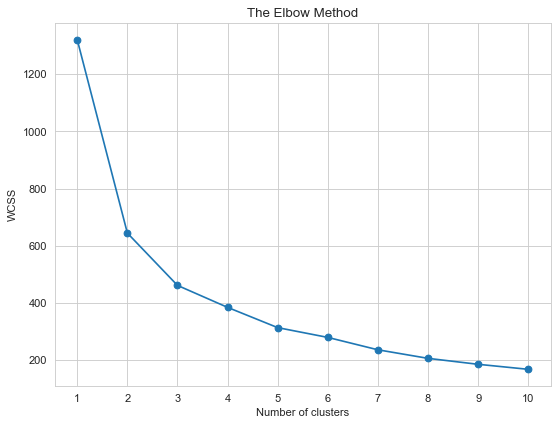

In [40]:
###Decide n-cluster using Elbow Method
wcss=[]
k_range = range(1,11)
for i in k_range:
    kmeans = skc.KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df2)
    wcss.append(kmeans.inertia_)
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
plt.plot(k_range, wcss, marker='o')
# for i, value in enumerate(wcss):
#     ax.text(i+1.05, value-0.005, round(value,1), fontsize=12, fontweight='bold')
    
plt.xticks(k_range)
# plt.grid()
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
# plt.savefig('elbow_method.png')
plt.show()

### 3. Clustering (Using chosen K values)

In [41]:
# Clustering K Means, K=3
kmeans_3 = skc.KMeans(n_clusters=3,random_state=42)
kmeans_3.fit(scaled_df2)
kmeans_3.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0,
       2, 0, 1, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0],
      dtype=int32)

In [42]:
# Assign clustering result to each country in the data frame
df_cluster2['cluster_id'] = kmeans_3.labels_
df_cluster2.head()

,"Bachelor's degree or higher of persons age 25 years+, 2017-2021","With a disability, under age 65 years, 2017-2021","Persons without health insurance, under age 65 years","In civilian labor force, total of population age 16 years+, 2017-2021","In civilian labor force, female of population age 16 years+, 2017-2021","Total retail sales per capita, 2017","Mean travel time to work (minutes), workers age 16 years+, 2017-2021","Median household income (in 2021 dollars), 2017-2021","Per capita income in past 12 months (in 2021 dollars), 2017-2021",Persons in poverty,"Total employer establishments, 2020","Total employment, 2020","Total annual payroll, 2020 ($1,000)","Population per square mile, 2020","Land area in square miles, 2020",cluster_id
0,4406.72,4434.26,2588.95,14184.13,14018.88,9461,36.1,44467,24539,5205.44,385,4572,167427,47.1,583.87,0
1,19418.97,12912.09,8540.28,61917.03,58765.26,16266,19.5,55114,28671,15555.51,2286,45012,1983272,253.9,402.55,0
2,11614.15,5179.28,4708.44,32592.87,29663.17,9431,24.2,58168,28992,5702.44,1034,18234,701075,124.0,422.99,0
3,14697.89,12361.80,9733.70,55190.08,51296.60,10406,25.8,49680,26777,15281.91,1806,24464,913850,139.0,702.07,0
4,21161.10,8005.22,5833.26,34316.97,33386.13,11148,21.9,47061,24990,12969.70,1029,13265,469095,124.0,503.64,0


In [43]:
df_cluster2['Banned or not'] = df.iloc[:,-1]
df_cluster2['County Name'] = df.iloc[:,0]
df_cluster2.head()

,"Bachelor's degree or higher of persons age 25 years+, 2017-2021","With a disability, under age 65 years, 2017-2021","Persons without health insurance, under age 65 years","In civilian labor force, total of population age 16 years+, 2017-2021","In civilian labor force, female of population age 16 years+, 2017-2021","Total retail sales per capita, 2017","Mean travel time to work (minutes), workers age 16 years+, 2017-2021","Median household income (in 2021 dollars), 2017-2021","Per capita income in past 12 months (in 2021 dollars), 2017-2021",Persons in poverty,"Total employer establishments, 2020","Total employment, 2020","Total annual payroll, 2020 ($1,000)","Population per square mile, 2020","Land area in square miles, 2020",cluster_id,Banned or not,County Name
0,4406.72,4434.26,2588.95,14184.13,14018.88,9461,36.1,44467,24539,5205.44,385,4572,167427,47.1,583.87,0,0.0,"Adams County, Ohio"
1,19418.97,12912.09,8540.28,61917.03,58765.26,16266,19.5,55114,28671,15555.51,2286,45012,1983272,253.9,402.55,0,1.0,"Allen County, Ohio"
2,11614.15,5179.28,4708.44,32592.87,29663.17,9431,24.2,58168,28992,5702.44,1034,18234,701075,124.0,422.99,0,0.0,"Ashland County, Ohio"
3,14697.89,12361.80,9733.70,55190.08,51296.60,10406,25.8,49680,26777,15281.91,1806,24464,913850,139.0,702.07,0,0.0,"Ashtabula County, Ohio"
4,21161.10,8005.22,5833.26,34316.97,33386.13,11148,21.9,47061,24990,12969.70,1029,13265,469095,124.0,503.64,0,0.0,"Athens County, Ohio"


In [44]:
groupeddf2 = df_cluster2.groupby('cluster_id')['Banned or not'].value_counts(ascending=True)
groupeddf2

cluster_id  Banned or not
0           1.0               7
            0.0              58
1           0.0               3
2           1.0               3
            0.0              17
Name: Banned or not, dtype: int64

### 4. Plotting clusters with chosen k value

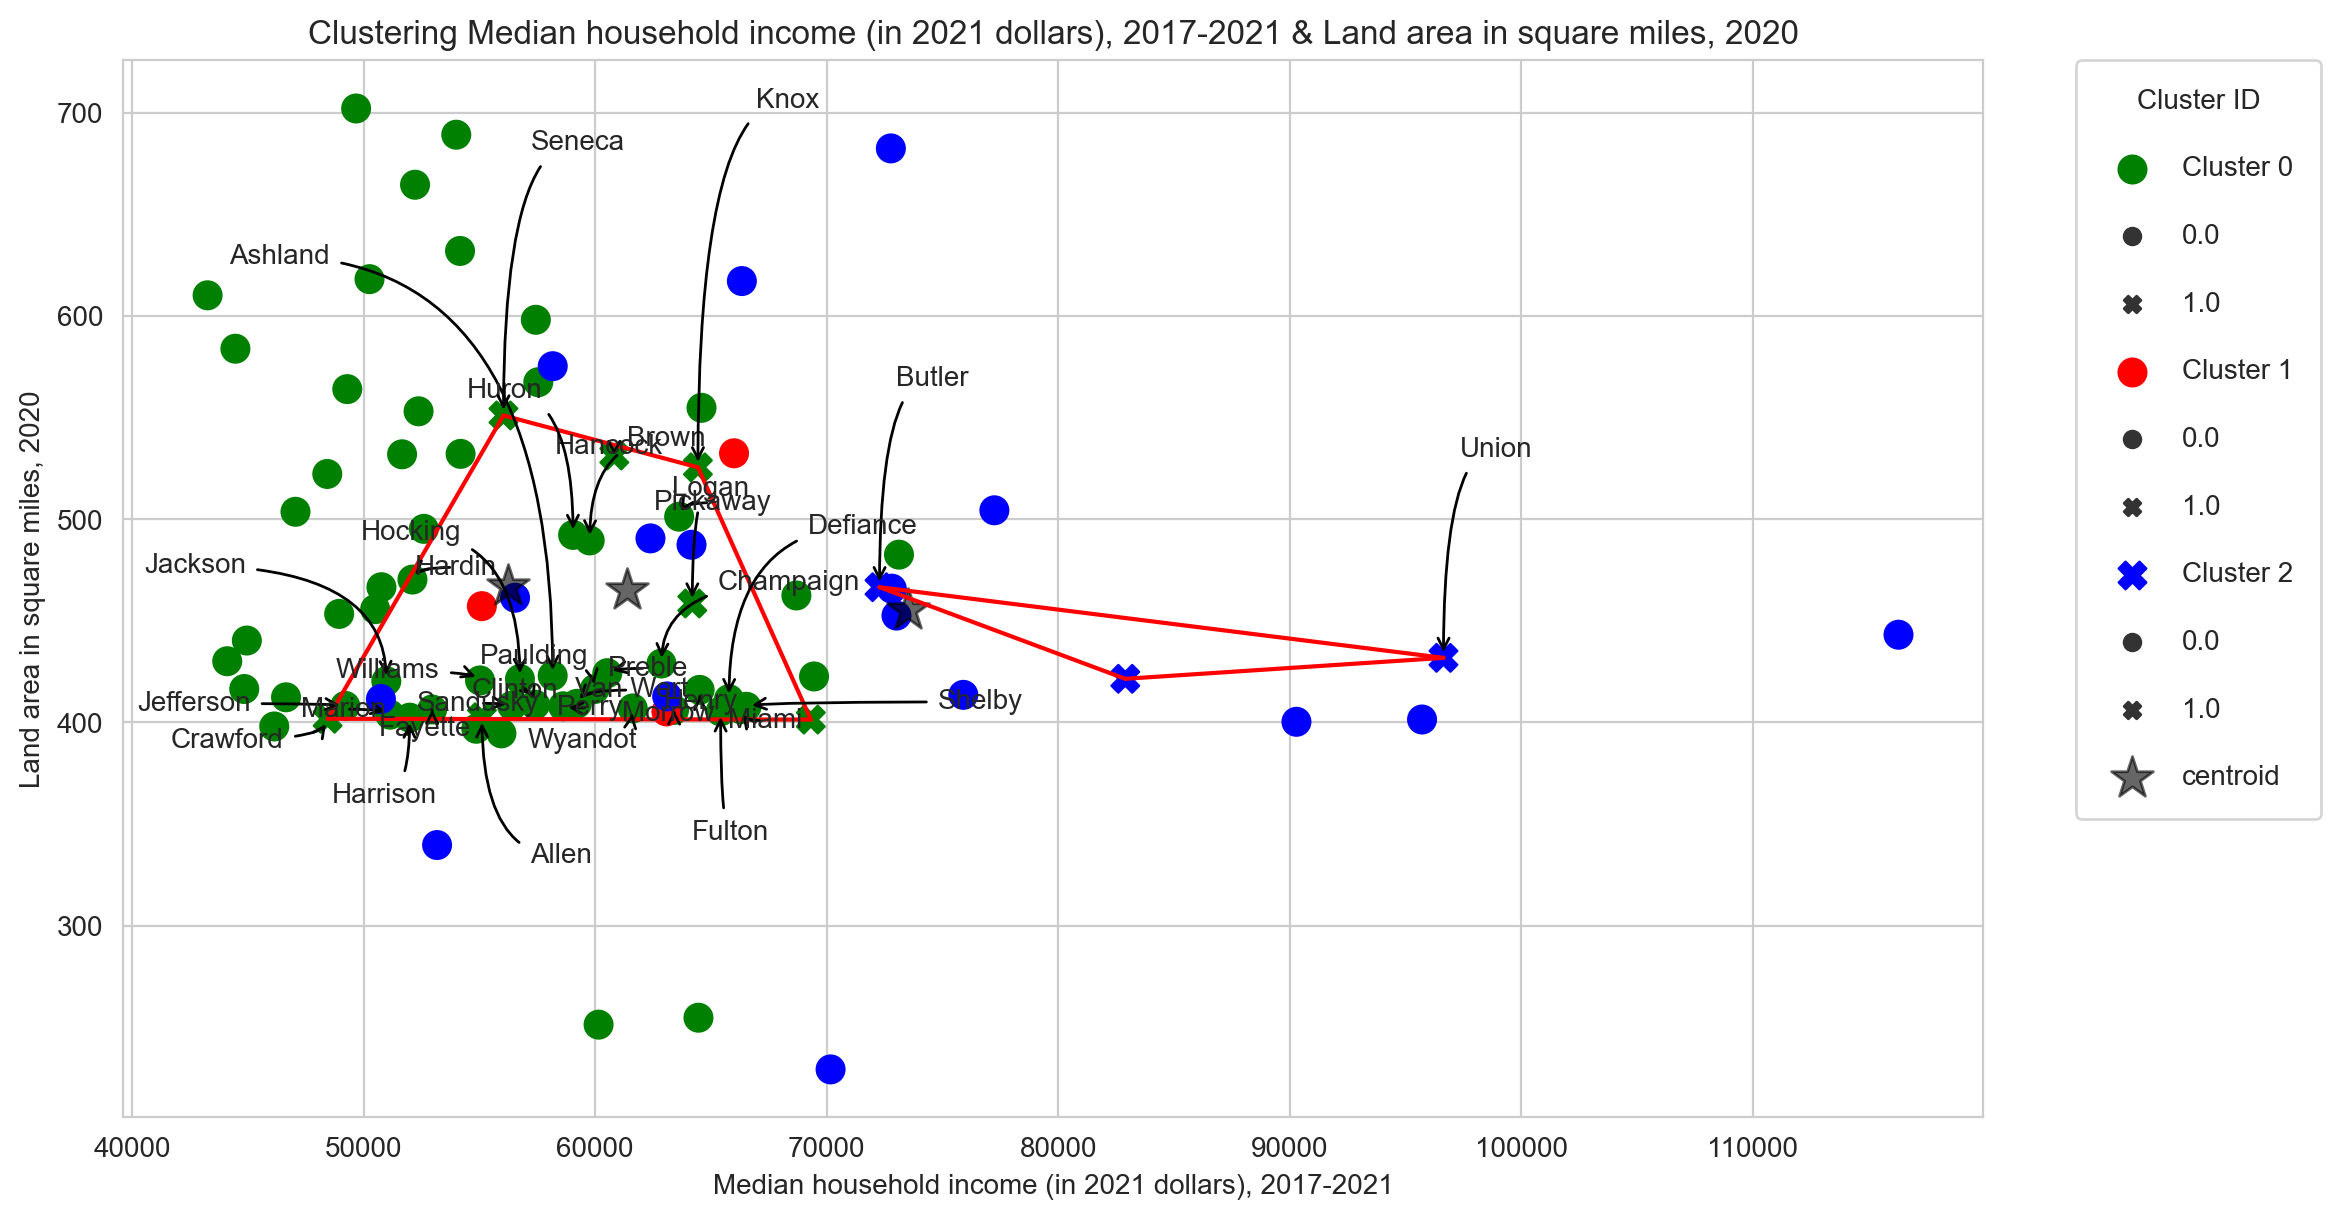

In [45]:
# Filter banned counties for each cluster
cluster0_banned = df_cluster2.loc[(df_cluster2['cluster_id'] == 0) & (df_cluster2['Banned or not'] == 1)]
cluster1_banned = df_cluster2.loc[(df_cluster2['cluster_id'] == 1) & (df_cluster2['Banned or not'] == 1)]
cluster2_banned = df_cluster2.loc[(df_cluster2['cluster_id'] == 2) & (df_cluster2['Banned or not'] == 1)]

# Extract coordinates for banned counties
cluster0_banned_coords = cluster0_banned[[df_cluster2.columns[7], df_cluster2.columns[14]]].values
cluster1_banned_coords = cluster1_banned[[df_cluster2.columns[7], df_cluster2.columns[14]]].values
cluster2_banned_coords = cluster2_banned[[df_cluster2.columns[7], df_cluster2.columns[14]]].values

hull0Banned = ConvexHull(cluster0_banned_coords)
hull2Banned = ConvexHull(cluster2_banned_coords)
 


sns.set_style('whitegrid')

# Centroid Inverse Scaling
centroids_ori_scale = sc.inverse_transform(kmeans_3.cluster_centers_)

# Plot Clustering Result
fig, ax = plt.subplots(figsize=(12, 7), dpi=200)

# Scatter plot for cluster 0
sns.scatterplot(df_cluster2.loc[df_cluster2['cluster_id'] == 0, df_cluster2.columns[7]],
                df_cluster2.loc[df_cluster2['cluster_id'] == 0, df_cluster2.columns[14]],
                color = 'green', s=100, edgecolor = 'green', marker='o', label= 'Cluster 0', style=df_cluster2['Banned or not'])

# Scatter plot for cluster 1
sns.scatterplot(df_cluster2.loc[df_cluster2['cluster_id'] == 1, df_cluster2.columns[7]], 
                df_cluster2.loc[df_cluster2['cluster_id'] == 1, df_cluster2.columns[14]], 
                color = 'red', s=100, edgecolor = 'red', label = 'Cluster 1', marker='o', style=df_cluster2['Banned or not'])

# Scatter plot for cluster 2
sns.scatterplot(df_cluster2.loc[df_cluster2['cluster_id'] == 2, df_cluster2.columns[7]],
                df_cluster2.loc[df_cluster2['cluster_id'] == 2, df_cluster2.columns[14]],
                color = 'blue', s=100, edgecolor = 'blue', label = 'Cluster 2', marker='o', style=df_cluster2['Banned or not'])

# Create a Path object from the convex hull vertices
path0Banned = mpath.Path(cluster0_banned_coords[hull0Banned.vertices])
path2Banned = mpath.Path(cluster2_banned_coords[hull2Banned.vertices])

textb = []
text2b = []
# Iterate through the data points and annotate the ones inside the convex hulls
for i in range(len(df_cluster2)):
    if df_cluster2.loc[i, 'cluster_id'] == 0:
        point = [df_cluster2.loc[i, df_cluster2.columns[7]], df_cluster2.loc[i, df_cluster2.columns[14]]]
        if path0Banned.contains_point(point):
            textb.append(ax.annotate(f"{df_cluster2.iloc[i, -1][:-13]}", (point[0], point[1]),
                                     textcoords="offset points", xytext=(0, 10), ha='center', 
                                    arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90", color='black')))

    elif df_cluster2.loc[i, 'cluster_id'] == 2:
        point = [df_cluster2.loc[i, df_cluster2.columns[7]], df_cluster2.loc[i, df_cluster2.columns[14]]]
        if path2Banned.contains_point(point):
            text2b.append(ax.annotate(f"{df_cluster2.iloc[i, -1][:-13]}", (point[0], point[1]), 
                                     textcoords="offset points", xytext=(0, 10), ha='center',
                                     arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90", color='black')))

# Use adjust_text to prevent text overlap
adjust_text(textb)
adjust_text(text2b)
    
for simplex0b in hull0Banned.simplices:
    ax.plot(cluster0_banned_coords[simplex0b, 0], cluster0_banned_coords[simplex0b, 1], 'k-', color='red')
for simplex1b in hull2Banned.simplices:
    ax.plot(cluster2_banned_coords[simplex1b, 0], cluster2_banned_coords[simplex1b, 1], 'k-', color='red')
    

# Plot centroids
ax.scatter(centroids_ori_scale[:, 7], centroids_ori_scale[:,14], c='black', s=250, marker='*', alpha=0.6, label = 'centroid')

# Add labels and legend
plt.legend(title= "Cluster ID", labelspacing=1.5, borderpad=1, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.xlabel(df_cluster2.columns[7])
plt.ylabel(df_cluster2.columns[14])
plt.title(f"Clustering {df_cluster2.columns[7]} & {df_cluster2.columns[14]}")
# Show the plot
plt.savefig('workEduClusterA.png')
# Show the plot
plt.show()


#### Get into table A

In [46]:
# Iterate through the data points and annotate the ones inside the convex hulls
lia = []
for i in range(len(df_cluster2)):
    if df_cluster2.loc[i, 'cluster_id'] == 0:
        point = [df_cluster2.loc[i, df_cluster2.columns[7]], df_cluster2.loc[i, df_cluster2.columns[14]]]
        if path0Banned.contains_point(point):
            lia.append(df_cluster.iloc[i, -1])
    elif df_cluster2.loc[i, 'cluster_id'] == 2:
        point = [df_cluster2.loc[i, df_cluster2.columns[7]], df_cluster2.loc[i, df_cluster2.columns[14]]]
        if path2Banned.contains_point(point):
            lia.append(df_cluster2.iloc[i, -1])
            
print(lia)

['Allen County, Ohio', 'Ashland County, Ohio', 'Brown County, Ohio', 'Butler County, Ohio', 'Champaign County, Ohio', 'Clinton County, Ohio', 'Crawford County, Ohio', 'Defiance County, Ohio', 'Fayette County, Ohio', 'Fulton County, Ohio', 'Hancock County, Ohio', 'Hardin County, Ohio', 'Harrison County, Ohio', 'Henry County, Ohio', 'Hocking County, Ohio', 'Huron County, Ohio', 'Jackson County, Ohio', 'Jefferson County, Ohio', 'Knox County, Ohio', 'Logan County, Ohio', 'Marion County, Ohio', 'Miami County, Ohio', 'Morrow County, Ohio', 'Paulding County, Ohio', 'Perry County, Ohio', 'Pickaway County, Ohio', 'Preble County, Ohio', 'Sandusky County, Ohio', 'Shelby County, Ohio', 'Williams County, Ohio', 'Seneca County, Ohio', 'Union County, Ohio', 'Wyandot County, Ohio', 'Van Wert County, Ohio']


In [47]:
dfs3 = []
for x in range(len(lia)):
    clusterDF3 = df_cluster2[df_cluster2['County Name'] == lia[x]]
    dfs3.append(clusterDF3)

clusterDFmain3 = pd.concat(dfs3, ignore_index=True)
scatterPlotdf2 = clusterDFmain3[['County Name', 'cluster_id', 'Median household income (in 2021 dollars), 2017-2021', 'Land area in square miles, 2020', 'Banned or not']]
scatterPlotdf2.describe()

,cluster_id,"Median household income (in 2021 dollars), 2017-2021","Land area in square miles, 2020",Banned or not
count,34.000000,34.000000,34.000000,34.000000
mean,0.117647,60217.147059,435.060882,0.235294
std,0.477665,8558.387890,42.331946,0.430562
min,0.000000,48449.000000,401.790000,0.000000
25%,0.000000,55346.250000,407.082500,0.000000
50%,0.000000,59488.000000,416.225000,0.000000
75%,0.000000,64054.250000,451.822500,0.000000
max,2.000000,96634.000000,551.030000,1.000000


In [48]:
# Assuming your DataFrame is called "df" and the column with the cluster information is called "cluster"
cluster_stats = scatterPlotdf2.iloc[:, :-1].groupby('cluster_id').describe()
cluster_stats

Median household income (in 2021 dollars), 2017-2021             \
                                                          count       mean   
cluster_id                                                                   
0                                                        32.0    58702.125   
2                                                         2.0    84457.500   

                                                                         \
                     std      min       25%      50%       75%      max   
cluster_id                                                                
0            5303.513879  48449.0  55093.00  59129.5  63465.50  66536.0   
2           17220.171442  72281.0  78369.25  84457.5  90545.75  96634.0   

           Land area in square miles, 2020                                 \
                                     count        mean        std     min   
cluster_id                                                                  
0                                     32.0  434.180938  43.295847  401.79   
2                                      2.0  449.140000  24.579032  431.76   

                                            
               25%     50%     75%     max  
cluster_id                                  
0           406.79  413.73  436.37  551.03  
2           440.45  449.14  457.83  466.52

### Plot # 2

NameError: name 'hull1Banned' is not defined

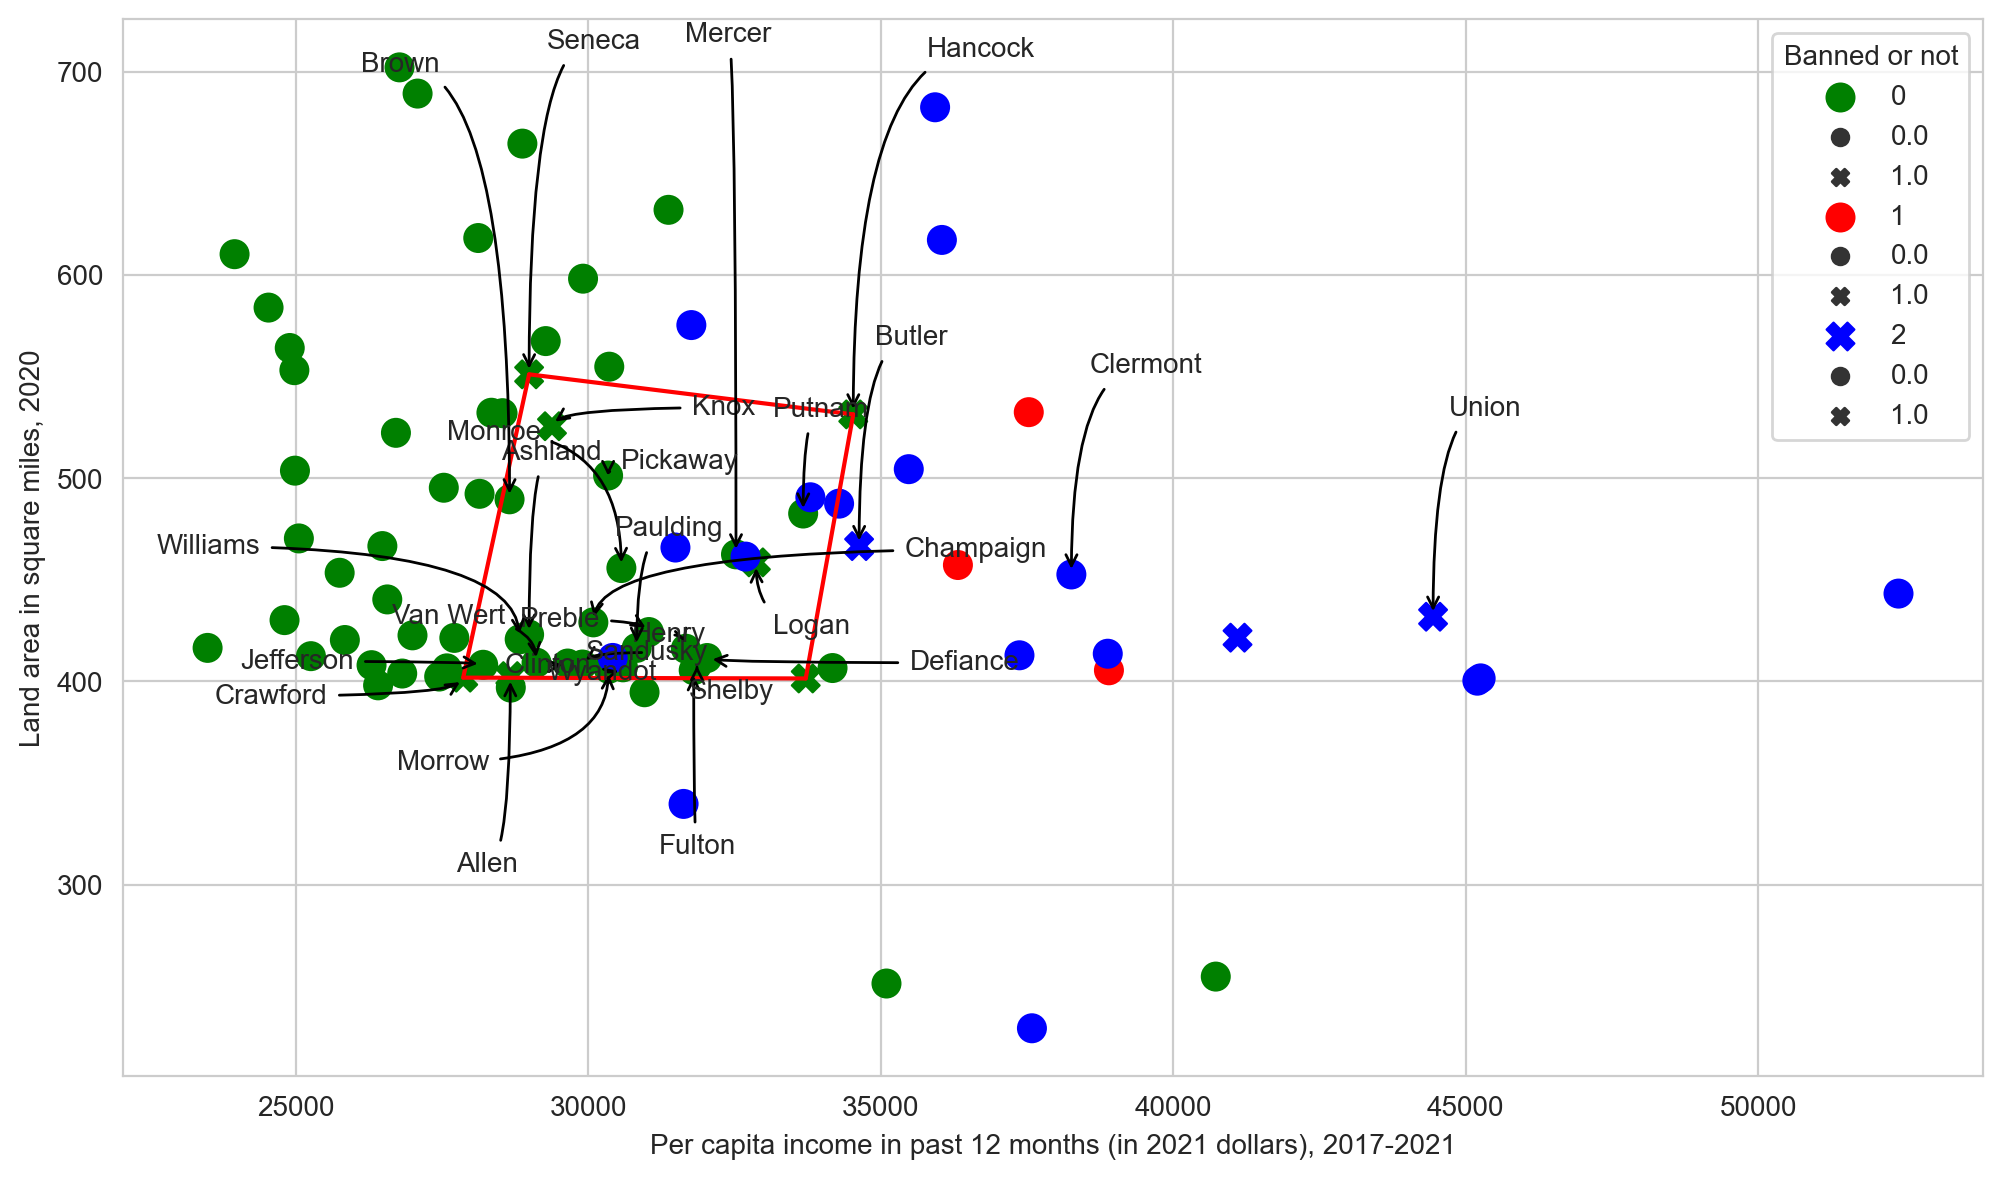

In [49]:
# Filter banned counties for each cluster
cluster0_banned = df_cluster2.loc[(df_cluster2['cluster_id'] == 0) & (df_cluster2['Banned or not'] == 1)]
cluster1_banned = df_cluster2.loc[(df_cluster2['cluster_id'] == 1) & (df_cluster2['Banned or not'] == 1)]
cluster2_banned = df_cluster2.loc[(df_cluster2['cluster_id'] == 2) & (df_cluster2['Banned or not'] == 1)]

# Extract coordinates for banned counties
cluster0_banned_coords = cluster0_banned[[df_cluster2.columns[8], df_cluster2.columns[14]]].values
cluster1_banned_coords = cluster1_banned[[df_cluster2.columns[8], df_cluster2.columns[14]]].values
cluster2_banned_coords = cluster2_banned[[df_cluster2.columns[8], df_cluster2.columns[14]]].values

hull0Banned = ConvexHull(cluster0_banned_coords)
hull2Banned = ConvexHull(cluster2_banned_coords)
 


sns.set_style('whitegrid')

# Centroid Inverse Scaling
centroids_ori_scale = sc.inverse_transform(kmeans_3.cluster_centers_)

# Plot Clustering Result
fig, ax = plt.subplots(figsize=(12, 7), dpi=200)

# Scatter plot for cluster 0
sns.scatterplot(df_cluster2.loc[df_cluster2['cluster_id'] == 0, df_cluster2.columns[8]],
                df_cluster2.loc[df_cluster2['cluster_id'] == 0, df_cluster2.columns[14]],
                color = 'green', s=100, edgecolor = 'green', marker='o', label= '0', style=df_cluster2['Banned or not'])

# Scatter plot for cluster 1
sns.scatterplot(df_cluster2.loc[df_cluster2['cluster_id'] == 1, df_cluster2.columns[8]], 
                df_cluster2.loc[df_cluster2['cluster_id'] == 1, df_cluster2.columns[14]], 
                color = 'red', s=100, edgecolor = 'red', label = '1', marker='o', style=df_cluster2['Banned or not'])

# Scatter plot for cluster 2
sns.scatterplot(df_cluster2.loc[df_cluster2['cluster_id'] == 2, df_cluster2.columns[8]],
                df_cluster2.loc[df_cluster2['cluster_id'] == 2, df_cluster2.columns[14]],
                color = 'blue', s=100, edgecolor = 'blue', label = '2', marker='o', style=df_cluster2['Banned or not'])

# Create a Path object from the convex hull vertices
path0Banned = mpath.Path(cluster0_banned_coords[hull0Banned.vertices])
path2Banned = mpath.Path(cluster2_banned_coords[hull2Banned.vertices])

textb = []
text2b = []
# Iterate through the data points and annotate the ones inside the convex hulls
for i in range(len(df_cluster2)):
    if df_cluster2.loc[i, 'cluster_id'] == 0:
        point = [df_cluster2.loc[i, df_cluster2.columns[8]], df_cluster2.loc[i, df_cluster2.columns[14]]]
        if path0Banned.contains_point(point):
            textb.append(ax.annotate(f"{df_cluster2.iloc[i, -1][:-13]}", (point[0], point[1]),
                                     textcoords="offset points", xytext=(0, 10), ha='center', 
                                    arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90", color='black')))

    elif df_cluster2.loc[i, 'cluster_id'] == 2:
        point = [df_cluster2.loc[i, df_cluster2.columns[8]], df_cluster2.loc[i, df_cluster2.columns[14]]]
        if path2Banned.contains_point(point):
            text2b.append(ax.annotate(f"{df_cluster2.iloc[i, -1][:-13]}", (point[0], point[1]), 
                                     textcoords="offset points", xytext=(0, 10), ha='center',
                                     arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90", color='black')))

# Use adjust_text to prevent text overlap
adjust_text(textb)
adjust_text(text2b)

    
for simplex0b in hull0Banned.simplices:
    ax.plot(cluster0_banned_coords[simplex0b, 0], cluster0_banned_coords[simplex0b, 1], 'k-', color='red')
for simplex1b in hull1Banned.simplices:
    ax.plot(cluster2_banned_coords[simplex1b, 0], cluster2_banned_coords[simplex1b, 1], 'k-', color='red')
    

# Plot centroids
ax.scatter(centroids_ori_scale[:, 8], centroids_ori_scale[:,14], c='black', s=250, marker='*', alpha=0.6, label = 'centroid')

# Add labels and legend
plt.legend(title= "Cluster ID", labelspacing=1.5, borderpad=1, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.xlabel(df_cluster2.columns[8])
plt.ylabel(df_cluster2.columns[14])
plt.title(f"Clustering {df_cluster2.columns[8]} & {df_cluster2.columns[14]}")

plt.savefig('workEduClusterB.png')

# Show the plot
plt.show()


In [ ]:
df_cluster2

In [ ]:
# pull summary stats of each point within the cluster
    # average, STD, range
    # "counties in these clusterds have simlar means...."
# piont out what is going on and how I came to this conclusion 
# annotate  

#### Get info into tableB

In [ ]:
# Iterate through the data points and annotate the ones inside the convex hulls
li2 = []
for i in range(len(df_cluster2)):
    if df_cluster2.loc[i, 'cluster_id'] == 0:
        point = [df_cluster2.loc[i, df_cluster2.columns[8]], df_cluster2.loc[i, df_cluster2.columns[14]]]
        if path0Banned.contains_point(point):
            li2.append(df_cluster.iloc[i, -1])
    elif df_cluster2.loc[i, 'cluster_id'] == 2:
        point = [df_cluster2.loc[i, df_cluster2.columns[8]], df_cluster2.loc[i, df_cluster2.columns[14]]]
        if path2Banned.contains_point(point):
            li2.append(df_cluster2.iloc[i, -1])
            
print(li2)

In [ ]:
dfs2 = []
for x in range(len(li2)):
    clusterDF2 = df_cluster2[df_cluster2['County Name'] == li[x]]
    dfs2.append(clusterDF2)

clusterDFmain = pd.concat(dfs2, ignore_index=True)
scatterPlotdf = clusterDFmain[['County Name', 'cluster_id', 'Per capita income in past 12 months (in 2021 dollars), 2017-2021', 'Land area in square miles, 2020', 'Banned or not']]
scatterPlotdf.describe()

In [ ]:
# Assuming your DataFrame is called "df" and the column with the cluster information is called "cluster"
cluster_stats = scatterPlotdf.iloc[:, :-1].groupby('cluster_id').describe()
cluster_stats

Cluster 0 has 26 observations with a mean per capita income of $29,465.54 in the past 12 months (in 2021 dollars), ranging from $24,980 to $35,100. The mean land area in this cluster is 499.01 square miles, ranging from 251.29 to 702.07 square miles.

Cluster 2, on the other hand, has only 3 observations with a higher mean per capita income of $35,667.33 in the past 12 months (in 2021 dollars), ranging from $30,421 to $41,100. The mean land area in this cluster is smaller than that of cluster 0 at 445.77 square miles, ranging from 411.49 to 504.37 square miles.

In [ ]:
markers = {1.0: '*', 0.0: 'o'}

<AxesSubplot:xlabel='Median household income (in 2021 dollars), 2017-2021', ylabel='Land area in square miles, 2020'>

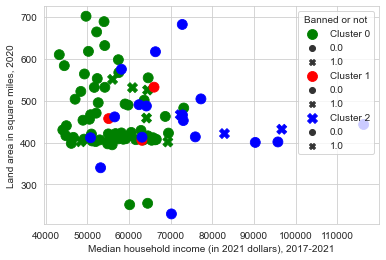

In [88]:
# Scatter plot for cluster 0
sns.scatterplot(df_cluster2.loc[df_cluster2['cluster_id'] == 0, df_cluster2.columns[7]],
                df_cluster2.loc[df_cluster2['cluster_id'] == 0, df_cluster2.columns[14]],
                color = 'green', s=100, edgecolor = 'green', marker='o', label= 'Cluster 0', style=df_cluster2['Banned or not'])

# Scatter plot for cluster 1
sns.scatterplot(df_cluster2.loc[df_cluster2['cluster_id'] == 1, df_cluster2.columns[7]], 
                df_cluster2.loc[df_cluster2['cluster_id'] == 1, df_cluster2.columns[14]], 
                color = 'red', s=100, edgecolor = 'red', label = 'Cluster 1', marker='o', style=df_cluster2['Banned or not'])

# Scatter plot for cluster 2
sns.scatterplot(df_cluster2.loc[df_cluster2['cluster_id'] == 2, df_cluster2.columns[7]],
                df_cluster2.loc[df_cluster2['cluster_id'] == 2, df_cluster2.columns[14]],
                color = 'blue', s=100, edgecolor = 'blue', label = 'Cluster 2', style=df_cluster2['Banned or not'])


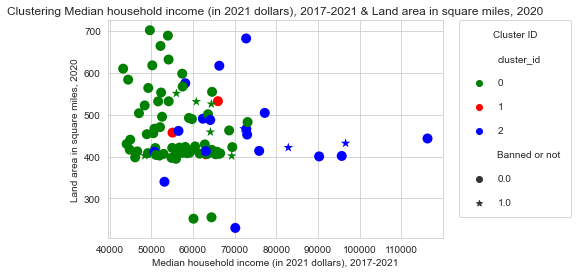

In [68]:

# Create a Path object from the convex hull vertices
path0Banned = mpath.Path(cluster0_banned_coords[hull0Banned.vertices])
path2Banned = mpath.Path(cluster2_banned_coords[hull2Banned.vertices])

textb = []
text2b = []
# Iterate through the data points and annotate the ones inside the convex hulls
for i in range(len(df_cluster2)):
    if df_cluster2.loc[i, 'cluster_id'] == 0:
        point = [df_cluster2.loc[i, df_cluster2.columns[7]], df_cluster2.loc[i, df_cluster2.columns[14]]]
        if path0Banned.contains_point(point):
            textb.append(ax.annotate(f"{df_cluster2.iloc[i, -1][:-13]}", (point[0], point[1]),
                                     textcoords="offset points", xytext=(0, 10), ha='center', 
                                    arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90", color='black')))

    elif df_cluster2.loc[i, 'cluster_id'] == 2:
        point = [df_cluster2.loc[i, df_cluster2.columns[7]], df_cluster2.loc[i, df_cluster2.columns[14]]]
        if path2Banned.contains_point(point):
            text2b.append(ax.annotate(f"{df_cluster2.iloc[i, -1][:-13]}", (point[0], point[1]), 
                                     textcoords="offset points", xytext=(0, 10), ha='center',
                                     arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=0,angleB=-90", color='black')))

# Use adjust_text to prevent text overlap
adjust_text(textb)
adjust_text(text2b)

    
for simplex0b in hull0Banned.simplices:
    ax.plot(cluster0_banned_coords[simplex0b, 0], cluster0_banned_coords[simplex0b, 1], 'k-', color='red')
for simplex1b in hull2Banned.simplices:
    ax.plot(cluster2_banned_coords[simplex1b, 0], cluster2_banned_coords[simplex1b, 1], 'k-', color='red')
    

# Plot centroids
ax.scatter(centroids_ori_scale[:, 7], centroids_ori_scale[:,14], c='black', s=250, marker='^', alpha=0.6, label = 'centroid')

# Add labels and legend
plt.legend(title= "Cluster ID", labelspacing=1.5, borderpad=1, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.xlabel(df_cluster2.columns[7])
plt.ylabel(df_cluster2.columns[14])
plt.title(f"Clustering {df_cluster2.columns[7]} & {df_cluster2.columns[14]}")

plt.savefig('workEduClusterB.png')

# Show the plot
plt.show()


<AxesSubplot:xlabel='Median household income (in 2021 dollars), 2017-2021', ylabel='Land area in square miles, 2020'>

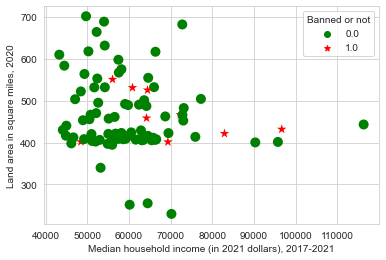

In [76]:
# Filter banned counties for each cluster
cluster0_banned = df_cluster2.loc[(df_cluster2['cluster_id'] == 0) & (df_cluster2['Banned or not'] == 1)]
cluster1_banned = df_cluster2.loc[(df_cluster2['cluster_id'] == 1) & (df_cluster2['Banned or not'] == 1)]
cluster2_banned = df_cluster2.loc[(df_cluster2['cluster_id'] == 2) & (df_cluster2['Banned or not'] == 1)]

# Extract coordinates for banned counties
cluster0_banned_coords = cluster0_banned[[df_cluster2.columns[7], df_cluster2.columns[14]]].values
cluster1_banned_coords = cluster1_banned[[df_cluster2.columns[7], df_cluster2.columns[14]]].values
cluster2_banned_coords = cluster2_banned[[df_cluster2.columns[7], df_cluster2.columns[14]]].values

hull0Banned = ConvexHull(cluster0_banned_coords)
hull2Banned = ConvexHull(cluster2_banned_coords)
 


sns.scatterplot(x=df_cluster2.iloc[:,7], y=df_cluster2.iloc[:,14], hue=df_cluster2['Banned or not'], palette=['green', 'red'], s=100, edgecolor='none', markers=markers, style=df_cluster2['Banned or not'])
